# **CUSTOMER ATTRITION**

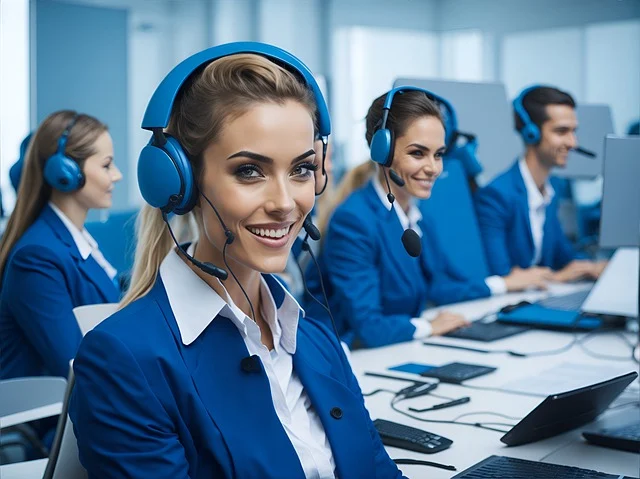

### **BUSINESS PROBLEM**

A financial institution is experiencing customer attrition, where existing customers are discontinuing their use of the company’s credit card services. This attrition impacts the company's profitability, as retaining customers is more cost-effective than acquiring new ones. The institution seeks to understand the factors contributing to customer attrition and develop strategies to retain valuable customers.

### **BUSINESS OBEJCTIVES**

**Identify At-Risk Customers:**

Use the provided dataset to predict which customers are likely to churn (Attrited Customers).
Understand key predictors of attrition, such as inactivity, income, and credit utilization patterns.

**Enhance Customer Retention Strategies:**

Develop actionable insights to target at-risk customers with retention campaigns.
Focus on improving customer engagement, satisfaction, and service personalization.

**Optimize Resource Allocation:**

Prioritize high-value customers for retention efforts based on features like income category, credit limit, and total transaction amount.
Minimize operational costs by identifying efficient strategies for managing customer relationships.

**Improve Product Offerings:**

Analyze customer behavior based on features like Card_Category and Total_Relationship_Count to tailor product offerings that meet customer needs.

**Boost Financial Performance:**

Reduce attrition rates, increase customer lifetime value, and enhance overall profitability.

### **KPIs**

#### **Business KPIs:**

1. **Customer Retention Rate:**

Percentage of customers retained over a specific period.

2. **Churn Rate**

Percentage of customers who stopped using the service over a given period.

3. **Customer Lifetime Value (CLV)**

Average revenue a company expects to earn from a customer throughout their relationship.

4. **Engagement Metrics**

Average number of transactions (Total_Trans_Ct) per customer in a year.

5. **Revenue Impact**

Total revenue loss due to churned customers over a specific period.

6. **Cost per Retained Customer**

Cost incurred to retain one customer.


#### **Financial KPIs:**

1. **Revenue Retention Rate:**

Percentage of revenue retained from existing customers after accounting for churn.

2. **Upselling and Cross-Selling Rate:**

Increase in additional product adoption (e.g., card upgrades or new accounts).

3. **Net Promoter Score (NPS):**

Measures customer satisfaction and loyalty, often impacted by retention strategies.

### **DATA UNDERSTANDING**

The data is obtained from https://Kaggle.com/datasets

**Clientnum:**

A unique identifier for each customer. Used as a primary key to distinguish individual records.

**Attrition_Flag:**

Indicates whether the customer is an Existing Customer or an Attrited Customer (has stopped using the service). This could be the target variable for a churn prediction model.

**Customer_Age:**

The age of the customer in years.

**Gender:**

The gender of the customer, represented as M (Male) or F (Female).

**Dependent_count:**

The number of dependents (e.g., children or other family members financially supported by the customer).

**Education_Level:**

The customer's level of education (e.g., High School, Graduate, Uneducated).

**Marital_Status:**

The marital status of the customer (e.g., Married, Single, Unknown).

**Income_Category:**

The customer's annual income range (e.g., $60K - $80K, Less than $40K).

**Card_Category:**

The type of card the customer uses (e.g., Blue, Gold, Silver). This could represent different tiers of service.
Months_on_book:

The number of months the customer has been associated with the institution.
Total_Relationship_Count:

The total number of products/services the customer has with the institution (e.g., accounts, loans, credit cards).

**Months_Inactive_12_mon:**

The number of months in the past 12 months the customer has been inactive.

**Contacts_Count_12_mon:**

The number of contacts (e.g., phone calls, emails) made with the customer in the past 12 months.

**Credit_Limit:**

The maximum credit limit for the customer.

**Total_Revolving_Bal:**

The total amount of the revolving balance (credit card balance carried over month to month).

**Avg_Open_To_Buy:**

The average credit available to the customer to make purchases.
Total_Amt_Chng_Q4_Q1:

The change in transaction amount between Q4 (Quarter 4) and Q1 (Quarter 1).

**Total_Trans_Amt:**

The total transaction amount made by the customer in the last 12 months.

**Total_Trans_Ct:**

The total number of transactions made by the customer in the last 12 months.

**Total_Ct_Chng_Q4_Q1:**

The change in transaction count between Q4 and Q1.

**Avg_Utilization_Ratio:**

The ratio of the credit balance to the credit limit, averaged over time.

**Naive_Bayes_Classifier_:**

These columns are outputs from a Naive Bayes classifier model, representing the probabilities of a customer being in certain classes (e.g., Attrited/Existing Customer) based on specific features.

In [ ]:
#Import necessary libaries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
#Load and read the dataset
data = pd.read_csv("/content/Predicting Credit Card Customer Segmentation.zip")
pd.options.display.max_columns = None


data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.shape

(10127, 23)

### **Data Overview**

Data is often not as clean as we would like. The data could have anomalies because of missing values, improper data types, duplicated data etc. For thsi reason this could negatively affect the prfromance of the model and therefore these need to be taken care of. This section takes care of this. The aim is to check:


*   Data Consistency
*   Data Uniformity
*   Data Completeness





**Data Consistency**

In [ ]:
#Check for duplicated entries
data.duplicated().sum()

0

There are no duplicate entries.

**Data Uniformity**

In [ ]:
#Check that appropriate data types apply
data.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


All columns are correctlty assigned the respective data type. Notice categorical data and therefore Lbel encoder will be used to convert the data to numerics for sklearn models.

**Data Completeness**

In [ ]:
#Using the isnull method to check for null values
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


The data is complete with no null values.

**EDA**

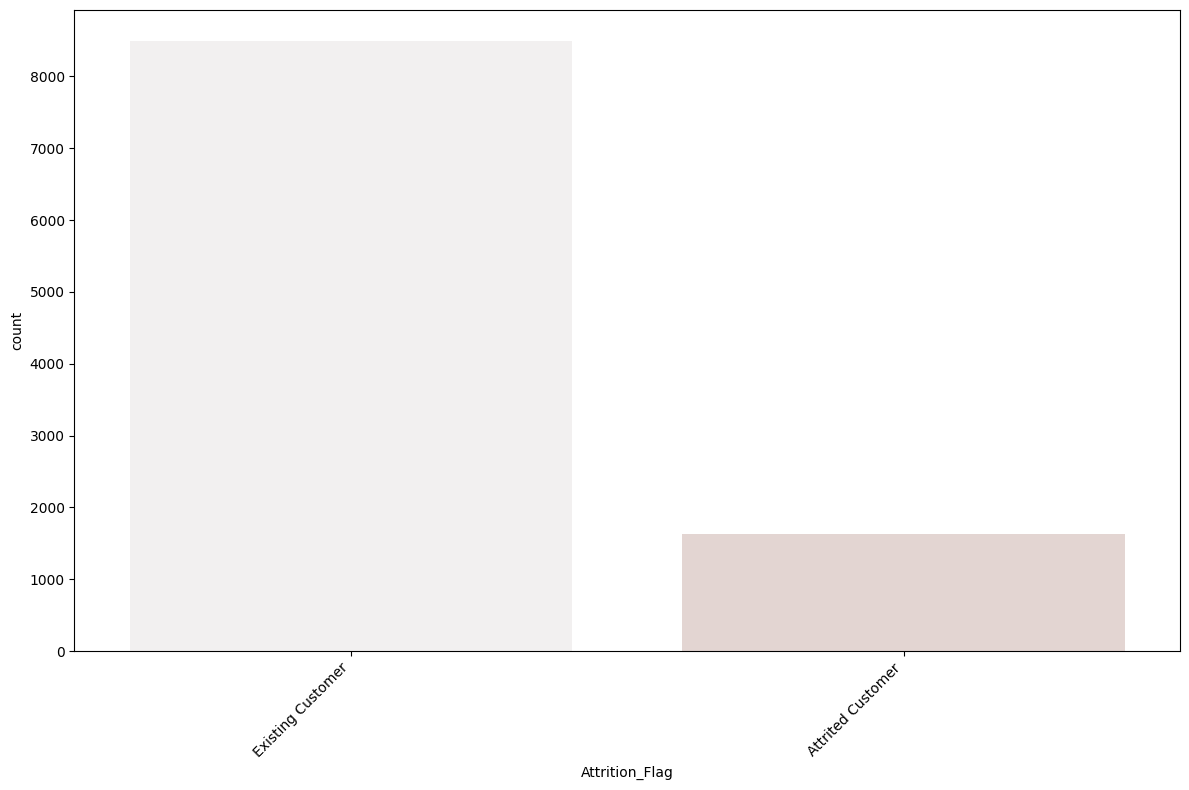

In [ ]:
# Calculate the order of categories based on their size
sorted_categories = data['Attrition_Flag'].value_counts().index

# Plot the count plot
color = sns.light_palette((20, 60, 50), input="husl")
plt.figure(figsize=(12, 8))
sns.countplot(
    x='Attrition_Flag',
    data=data,
    palette=color,
    order=sorted_categories  # Align bars by size
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Existing customers are 4 times as many as attrited customers. This could adversely affect the perfromance of the model. Therefore sampling techniques will be used for balancing imbalanced data.

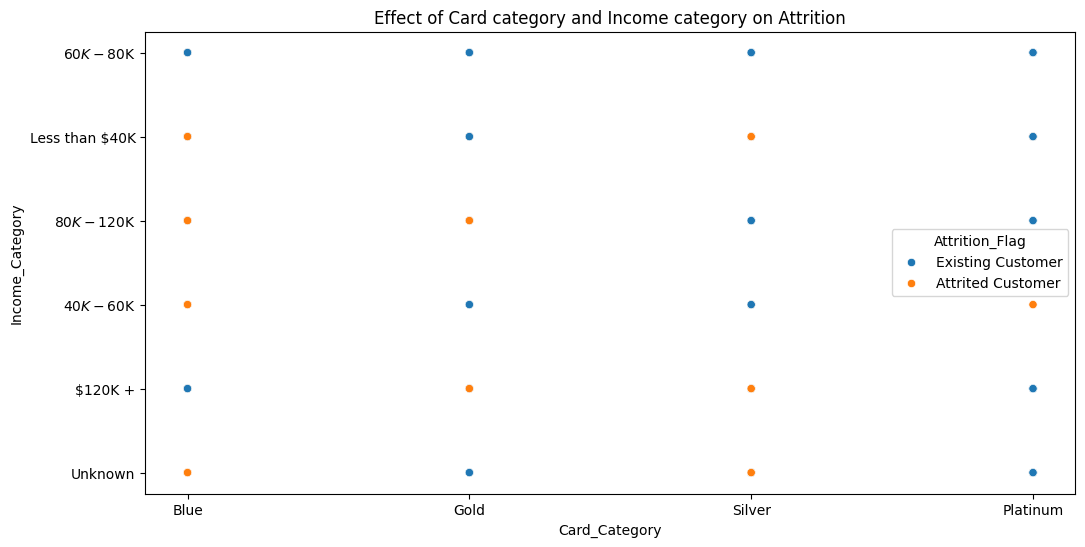

In [ ]:
#How attrition is affected by financial status
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = 'Card_Category', y = 'Income_Category', hue = 'Attrition_Flag')
plt.title("Effect of Card category and Income category on Attrition")
plt.show()

Customers with Blue card category tend to have more cases of attrition compared to other card categories. Platinum card holders have the least instances of customer attrition. However, the 40k - 60k income earners in Platinum card holders have a majority of attrition.

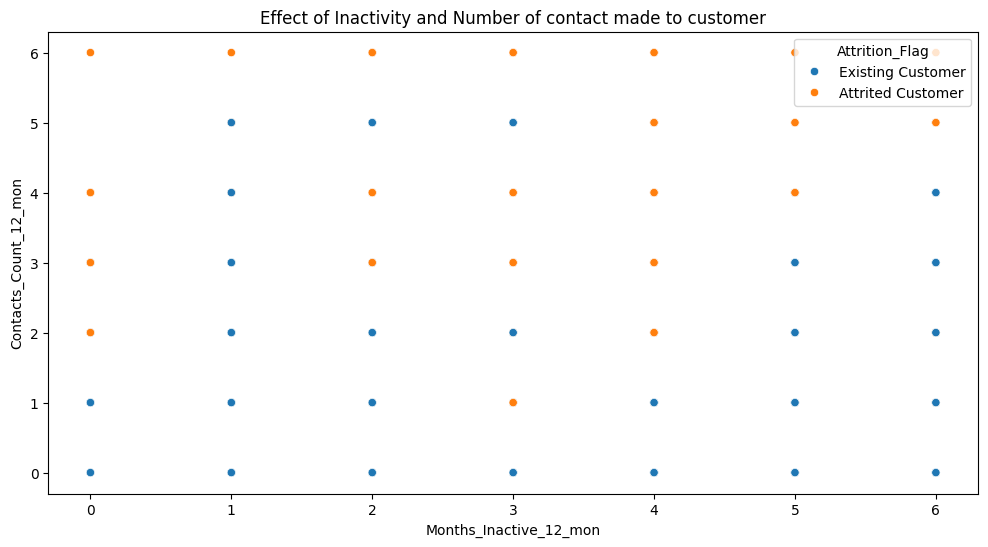

In [ ]:
#Inactivity and number of contacts made to a customer
plt.figure(figsize = (12,6))
sns.scatterplot(data = data, x = 'Months_Inactive_12_mon', y = 'Contacts_Count_12_mon', hue = 'Attrition_Flag')
plt.title("Effect of Inactivity and Number of contact made to customer")
plt.show()

Despite reaching out 3-6 times a month, the financial institution faced a high attrition rate from customers who had been inactive for utmost 0 months and 4 months. 2 and 3 months inactivity has an average effect on customers who continue to seek the institution's services. Customers who have been inactive for 1 month have the lowest attrition. Contacting a customer for upto 5 times would be the signal that they have left the institution.

### **Data Preprocessing**

We have 6 columns of data type object. These 6 columns hold different values and significance ot the dataset. Income category, card category and education level matter on the order in which they appear. Gender and marital ststus on the other hand do not really matter on order of appearance. Attrition flag column is our taget column and since it is categorical we use Label encoder.

**Ordinal Encoder:** Encode categorical features as an integer array.
The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

**OneHotEncoder:** Encode categorical features as a one-hot numeric array.The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter).By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

**Label Encoder:** Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
#Clean the unknown category of income column
unknown_income = data[data['Income_Category'] == 'Unknown']
data.drop(unknown_income.index, inplace = True)

In [ ]:
#Clean unknown category in education level column
unknown_edu = data[data['Education_Level'] == 'Unknown']
data.drop(unknown_edu.index, inplace = True)

In [ ]:
#Clean unknown category in Marital_status column
unknown_marital = data[data['Marital_Status'] == 'Unknown']
data.drop(unknown_marital.index, inplace = True)

In [ ]:
data['Marital_Status'].unique()

array([1, 2, 0])

In [ ]:
#Using Ordinal Encoding for ordinal columns
ordinal_columns = ['Income_Category', 'Card_Category', 'Education_Level']
ordinal_encoders = {
    'Income_Category': OrdinalEncoder(categories=[['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']]),
    'Card_Category': OrdinalEncoder(categories=[['Blue', 'Silver', 'Gold', 'Platinum']]),
    'Education_Level': OrdinalEncoder(categories=[['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']])
}

for col in ordinal_columns:
    data[col] = ordinal_encoders[col].fit_transform(data[[col]])

In [ ]:
#Using Label Encoder for gender nad marita stastus columns
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # 0 = Female, 1 = Male
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [ ]:
#Using LabelEncoder for target column
label_encoder = LabelEncoder()
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])  # 0 = Existing Customer, 1 = Attrited Customer

**Split the data to X and y**

In [ ]:
X = data.drop(columns = ['Attrition_Flag', 'CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
              axis = 1)

y = data['Attrition_Flag']

**Standard Scaling**

StandardScaler operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

**Impact on Data Distribution:** StandardScaler does not alter the shape of the distribution of each feature; it only shifts and scales it. As a result, the relative relationships between feature values are preserved, making it suitable for datasets with non-Gaussian distributions.

**Advantages:**

**Enhances Model Performance:** StandardScaler helps improve the performance and convergence of machine learning models, particularly those sensitive to feature scales, such as linear regression, logistic regression, and support vector machines.

**Facilitates Interpretability:** By standardizing features, StandardScaler makes it easier to interpret the coefficients or weights assigned to each feature in linear models.

**Robustness to Outliers:** StandardScaler is relatively robust to the presence of outliers compared to min-max scaling, as it relies on the mean and standard deviation rather than the range of the data.

**Considerations:**
Data Leakage: It's crucial to fit StandardScaler only on the training data and then apply the same transformation to the testing data to avoid data leakage and ensure model generalization..

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
#Initialize standard scaler
scaler = StandardScaler()

#Fit and transform X
X_scaled = scaler.fit_transform(X)

#Convert to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

**SMOTE Sampling**

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
# Compute the number of samples in the smallest class
minority_class_count = min(pd.Series(y).value_counts())
k_neighbors = min(5, minority_class_count - 1)  # Adjust k_neighbors accordingly

#Initialize smote with parameters
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

#Determine the nummbers
print("Class distribution after SMOTE: \n", y_balanced.value_counts())

Class distribution after SMOTE: 
 Attrition_Flag
1    5968
0    5968
Name: count, dtype: int64


**Splitting the data**

Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation, next(ShuffleSplit().split(X, y)), and application to input data into a single call for splitting (and optionally subsampling) data into a one-liner.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.3, random_state = 42)

In [ ]:
clean_attrition_train = pd.concat([X_train, y_train], axis = 1)
clean_attrition_train.to_csv('clean_attrition_train.csv', index = False)

### **Model Selection**

The project is a classification project and therefore will require classification models. For this case, we will evaluate the prfromance of Logistic regression, Random forest Classifier and KNearest neighbors.


1. **Random Forest Classifier** is an ensemble method that combines multiple decision trees to make more robust predictions. It builds multiple decision trees on random subsets of data (using bootstrapping). Each tree splits features at decision nodes to minimize impurity (e.g., Gini Index or Entropy). For classification, it aggregates the predictions from all trees (majority vote). By combining many "weak learners" (individual decision trees), Random Forest reduces overfitting and improves generalization.

2. **K-Nearest Neighbors (KNN)** is a lazy learning algorithm that classifies data points based on the majority class of their K nearest neighbors in the feature space. No explicit training. It simply stores the data. To classify a new data point. Computes the distance (e.g., Euclidean) between the point and all existing points. Identifies the K closest points. Assign the majority class among these neighbors.

3. **Gaussian Naive Bayes (GaussianNB)** model is a classification algorithm based on Bayes' Theorem. It assumes that the features are conditionally independent given the class label and that they follow a Gaussian (normal) distribution. This simplicity makes GaussianNB fast and effective for many problems, especially those with normally distributed data.

In [ ]:
#Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

#Fit the model
rf.fit(X_train, y_train)

#Predict the modle using the test data
y_pred_rf = rf.predict(X_test)

#Prediction probability
y_pred_rf_prob = rf.predict_proba(X_test)

#Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Use 'macro' for unweighted average
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy_rf)
print("F1_Score:", f1_rf)
print("recall_Score:", recall_rf)

Accuracy: 0.9771013683328679
F1_Score: 0.9771037114373694
recall_Score: 0.9771013683328679


In [ ]:
# Initialize K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the model using the test data
y_pred_knn = knn.predict(X_test)

# Prediction probabilities (optional, if needed)
y_pred_knn_prob = knn.predict_proba(X_test)

#Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # Use 'macro' for unweighted average
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print("Accuracy:", accuracy_knn)
print("F1_Score:", f1_knn)
print("Recall_Score:", recall_knn)

Accuracy: 0.9134320022340129
F1_Score: 0.9130460149635717
Recall_Score: 0.9134320022340129


In [ ]:
# Train GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get predictions and probabilities
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb_prob = gnb.predict_proba(X_test)

# Calculate metrics
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')  # Use 'macro' for unweighted average
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')

# Print metrics
print("Accuracy:", accuracy_gnb)
print("F1_Score:", f1_gnb)
print("Recall_Score:", recall_gnb)


Accuracy: 0.8064786372521642
F1_Score: 0.8064763735897176
Recall_Score: 0.8064786372521642


### **Multiclass ROC-Curve**

ROC-Curve is a measure of model performance that is combined with other metrics. It measures sensitivity and 1-specificity of the model. Generally we want to see a large area between the curve and the 45 degreess diagoonal line. We also use the AUC(area under curve) as a measure of perfromance. For a model that is performing well, the AUC is greater than 0.7. We will use these measures to confirm that our accuracy score is inline with ROC-AUC.

**Combined performance of all models**

This aims at capturing which class is better predicted based on combined probabilities of the three models

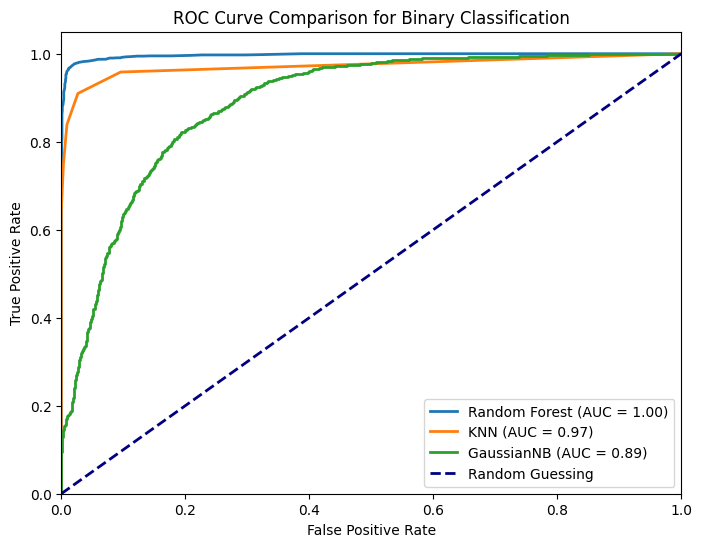

In [ ]:
# Step 1: Compute ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob[:, 1])  # Random Forest probabilities
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_prob[:, 1])  # KNN probabilities
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb_prob[:, 1])  # GaussianNB probabilities
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Step 2: Plot the ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', lw=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', lw=2)
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})', lw=2)

# Step 3: Add random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Step 4: Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Binary Classification')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier does best compared to the rest of the models, a confirmation  from previous evaluation metrics.

#### **Hyperparameter Tuning**

We have identified that Random Forest is our best model based on the above metrics with an accuracy score of 87%. However, a model's parameters can be tuned for optimized performance. Random Forest in this case can perform better when parameters such as no_of_estimators, max_depth and no_of_iterations are optimized. Other times default parameters will do better.

In [ ]:
#Define the parameter grid
param_grid = {
    'n_estimators': [50,100],  # Number of trees in the forest
    'max_depth': [None, 2],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}
#Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state = 42)

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)

#Fit the model
grid_search.fit(X_train, y_train)

#Find best parameters
best_params = grid_search.best_params_
print("Best parameters are:", best_params)

# Get the best model
rf_best = grid_search.best_estimator_

#Test accuracy
y_pred_rf_best = rf_best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_rf_best))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

**Feature Importance**

                     Feature  Importance
16            Total_Trans_Ct    0.210320
15           Total_Trans_Amt    0.169450
12       Total_Revolving_Bal    0.114245
17       Total_Ct_Chng_Q4_Q1    0.098939
18     Avg_Utilization_Ratio    0.060812
8   Total_Relationship_Count    0.057619
9     Months_Inactive_12_mon    0.055391
14      Total_Amt_Chng_Q4_Q1    0.047351
10     Contacts_Count_12_mon    0.042628
0               Customer_Age    0.026082
13           Avg_Open_To_Buy    0.025649
11              Credit_Limit    0.021301
7             Months_on_book    0.018043
2            Dependent_count    0.014939
3            Education_Level    0.011581
5            Income_Category    0.010591
4             Marital_Status    0.007596
1                     Gender    0.005170
6              Card_Category    0.002292


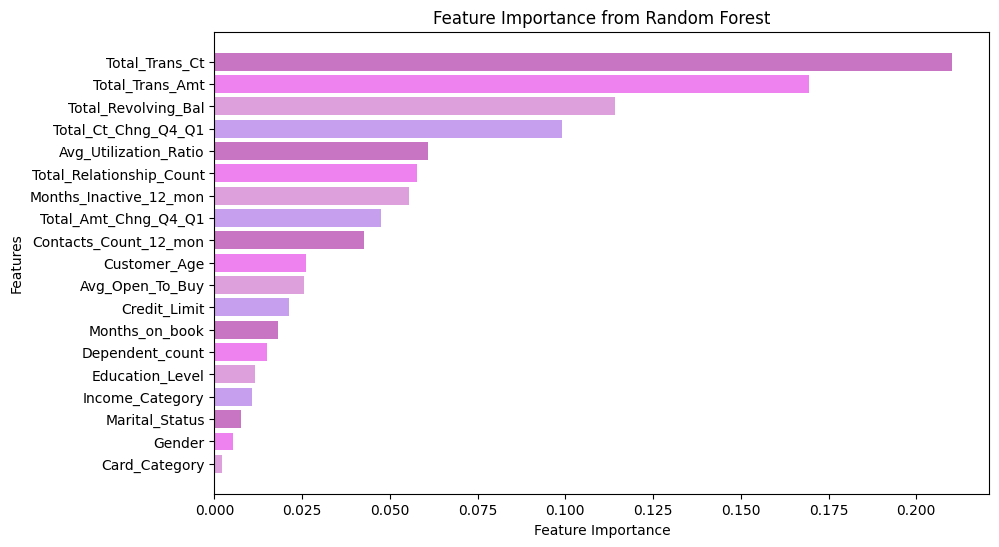

In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
# Custom colors for each bar
colors = ['#C875C4', '#EE82EE', '#DDA0DD', '#C79FEF']
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color = colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

### **Conclusions:**

**Key Insights:**

1. **Key Influential Features:**

**Total_Trans_Ct** (Transaction Count) and **Total_Trans_Amt** (Transaction Amount) are the most important features. These significantly impact your model's output, suggesting that transaction behavior (volume and frequency) is crucial in determining the prediction target.
**Total_Revolving_Bal** and **Total_Ct_Chng_Q4_Q1** are the next most influential features, indicating that revolving balances and transaction changes over time are also important predictors.

2. **Moderately Important Features:**

Features such as **Avg_Utilization_Ratio, Total_Relationship_Count,** and **Months_Inactive_12_mon** show moderate importance. This suggests that customer utilization and inactivity periods influence the prediction but to a lesser degree.

3. **Low-Impact Features:**

Features like **Card_Category, Gender, and Marital_Status** have very low importance. These features contribute minimally to the predictions and may not be as significant in differentiating outcomes.

**Recommendations:**

1. **Focus on Transaction Features:**

Since Total_Trans_Ct and Total_Trans_Amt are the most significant predictors, these should be prioritized in further analysis or modeling.
Consider segmenting customers based on transaction count or amount to identify trends and behaviors.

2. **Analyze Balance-Related Features:**

Features like Total_Revolving_Bal and Avg_Utilization_Ratio indicate the impact of credit usage. You can investigate:
Customers with high utilization ratios or revolving balances.
Trends that might suggest risky or profitable customer segments.

3. **Feature Optimization:**

Low-importance features like Gender, Card_Category, and Marital_Status could potentially be dropped or further analyzed to confirm their redundancy.
Removing these features may simplify the model without significantly reducing performance.

4. **Model Enhancement:**

Consider feature engineering for transaction-related features, such as calculating transaction frequency over specific time frames.
Further explore temporal patterns (e.g., trends over months) or interactions between Total_Trans_Ct and Total_Trans_Amt.

5. **Business Insights:**

Develop strategies or customer outreach programs targeting users with high transaction counts but low transaction amounts to increase their spending behavior.
Address customer inactivity (Months_Inactive_12_mon) through re-engagement campaigns.

